# 2-11. 프로젝트_load_digits_손글씨 분류

## (1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [4]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

## (3) 데이터 이해하기

### Feature Data 지정하기

In [4]:
digits_data = digits.data
digits_data.shape

(1797, 64)

### Label Data 지정하기

In [5]:
digits_label = digits.target
print(digits_label.shape)

(1797,)


### Target Names 출력해 보기

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터 Describe 해보기

In [7]:
# 데이터의 크기 확인
digits_data.shape

(1797, 64)

In [8]:
# 샘플로 1개의 데이터 확인
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

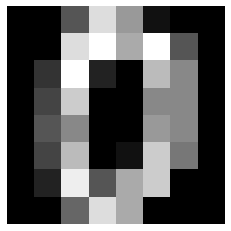

In [9]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

## (4) train, test 데이터 분리

In [10]:
# 데이터셋 나누기 - train/test(8:2)
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [11]:
X_train.shape

(1437, 64)

In [12]:
X_test.shape

(360, 64)

## (5) 다양한 모델로 학습시켜보기 및 평가

### Decision Tree

In [14]:
# Decision Tree import하기
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 32)


# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.81      0.79      0.80        28
           2       0.87      0.82      0.84        33
           3       0.79      0.91      0.85        34
           4       0.81      0.85      0.83        46
           5       0.91      0.83      0.87        47
           6       0.94      0.94      0.94        35
           7       0.81      0.85      0.83        34
           8       0.85      0.77      0.81        30
           9       0.80      0.88      0.83        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



In [15]:
# 정확도
from sklearn.metrics import accuracy_score

print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.8527777777777777


### Grid Search - 하이퍼 파라미터 튜닝

In [16]:
# 1. 반복문 사용
depth_list = range(1, 30)

# 각각의 max_depth에  따른 train/test 정확도 저장할 리스트
train_acc_list = []
test_acc_list = []

In [17]:
for depth in depth_list:
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 32)
    decision_tree.fit(X_train, y_train)
    
    pred_train = decision_tree.predict(X_train)
    pred_test = decision_tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [18]:
import pandas as pd
result = pd.DataFrame(dict(max_depth = depth_list,
                          Train = train_acc_list,
                          Test = test_acc_list))
result

,max_depth,Train,Test
0,1,0.206681,0.163889
1,2,0.324983,0.297222
2,3,0.473208,0.472222
3,4,0.567154,0.586111
4,5,0.674322,0.661111
5,6,0.794015,0.772222
6,7,0.891441,0.830556
7,8,0.922060,0.852778
8,9,0.947808,0.852778
9,10,0.967989,0.869444


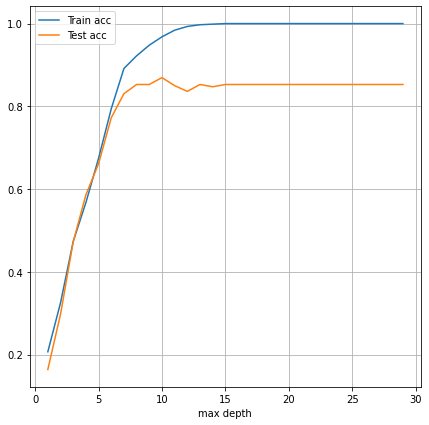

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(depth_list, train_acc_list, label = 'Train acc')
plt.plot(depth_list, test_acc_list, label = 'Test acc')
plt.xlabel("max depth")
plt.grid(True)
plt.legend()
plt.show()

#### RandomizedSearchCV
- 주요 매개변수
    - estimator: 모델객체 지정
    - param_distributions : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - n_iter : 파라미터 검색 횟수
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환

In [20]:
from sklearn.model_selection import RandomizedSearchCV

decision_tree = DecisionTreeClassifier()

# 360개의 조합
param_grid = {
    'max_depth': range(1, 21),  # 20
    'max_leaf_nodes': range(2, 11),  # 9
    'criterion': ['gini', 'entropy'],  # 2
    'random_state': [1, 32]
}
n_iter = 50  # 확인할 조합의 개수. default: 10개
randomized_search = RandomizedSearchCV(decision_tree,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      scoring = "accuracy",
                                      cv = 3,
                                      n_jobs = -1)


In [21]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 21),
                                        'max_leaf_nodes': range(2, 11),
                                        'random_state': [1, 32]},
                   scoring='accuracy')

In [22]:
df = pd.DataFrame(randomized_search.cv_results_)
df.shape

(50, 15)

In [23]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004891,0.000160,0.000529,0.000034,1,4,14,gini,"{'random_state': 1, 'max_leaf_nodes': 4, 'max_...",0.369520,0.365344,0.361169,0.365344,0.003409,27
1,0.004499,0.000293,0.000499,0.000056,1,3,10,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.300626,0.286013,0.294363,0.293667,0.005986,38
2,0.010270,0.000232,0.000570,0.000011,1,8,12,entropy,"{'random_state': 1, 'max_leaf_nodes': 8, 'max_...",0.567850,0.559499,0.594990,0.574113,0.015151,15
3,0.004550,0.000053,0.000466,0.000009,32,4,15,gini,"{'random_state': 32, 'max_leaf_nodes': 4, 'max...",0.369520,0.365344,0.361169,0.365344,0.003409,27
4,0.005590,0.000108,0.000469,0.000024,32,3,3,entropy,"{'random_state': 32, 'max_leaf_nodes': 3, 'max...",0.292276,0.296451,0.288100,0.292276,0.003409,40
5,0.010793,0.000123,0.000498,0.000014,32,9,15,entropy,"{'random_state': 32, 'max_leaf_nodes': 9, 'max...",0.588727,0.607516,0.643006,0.613083,0.022507,10
6,0.006606,0.000055,0.000488,0.000044,32,4,7,entropy,"{'random_state': 32, 'max_leaf_nodes': 4, 'max...",0.354906,0.336117,0.334029,0.341684,0.009388,32
7,0.009011,0.000035,0.000464,0.000007,32,7,10,entropy,"{'random_state': 32, 'max_leaf_nodes': 7, 'max...",0.517745,0.492693,0.542797,0.517745,0.020455,19
8,0.010745,0.000027,0.000456,0.000020,32,10,11,entropy,"{'random_state': 32, 'max_leaf_nodes': 10, 'ma...",0.611691,0.632568,0.663883,0.636047,0.021449,3
9,0.004529,0.000266,0.000447,0.000020,1,2,3,entropy,"{'random_state': 1, 'max_leaf_nodes': 2, 'max_...",0.200418,0.204593,0.196242,0.200418,0.003409,46


In [24]:
randomized_search.best_params_

{'random_state': 32,
 'max_leaf_nodes': 10,
 'max_depth': 16,
 'criterion': 'gini'}

In [25]:
randomized_search.best_estimator_

DecisionTreeClassifier(max_depth=16, max_leaf_nodes=10, random_state=32)

#### 최적의 하이퍼 파라미터로 재학습

In [42]:
decision_tree = DecisionTreeClassifier(random_state = 32,
                                       max_leaf_nodes = 10,
                                       max_depth = 7,
                                       criterion = 'entropy')
# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.77      0.36      0.49        28
           2       0.74      0.52      0.61        33
           3       0.64      0.79      0.71        34
           4       0.57      0.57      0.57        46
           5       0.82      0.66      0.73        47
           6       0.64      0.91      0.75        35
           7       0.38      0.47      0.42        34
           8       0.60      0.80      0.69        30
           9       0.79      0.65      0.71        40

    accuracy                           0.66       360
   macro avg       0.69      0.66      0.66       360
weighted avg       0.69      0.66      0.66       360



In [43]:
print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 0.6722338204592901
Test 정확도: 0.6638888888888889


#### 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ##### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ##### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ##### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ##### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ##### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

####   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [ ]:
# pip install scikit-learn --upgrade

In [28]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [29]:
# 예측값, 실제값(Ground Truth)
# (pred_train, y_train), (pred_test, y_test)
# 전부 0으로 예측
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[140   0   0   2   1   0   0   0   1   1]
 [  0  40   5   9   0   6   6  16  48  24]
 [  2   1  90   8   0   0  10   1  32   0]
 [  0   0   6 120   6   7   1   6   1   2]
 [  6   8   0   0  69   7  17  22   5   1]
 [  4   1   6   0   0  81   4  34   1   4]
 [  4   0   0   0   2   0 139   0   1   0]
 [  0   0   0   2  41   3   1  91   4   3]
 [  3   2  29   0   3   0   0   2 104   1]
 [  0   0   3  38   1   1   0   4   1  92]]
--------------------------------------------------
Test confusion matrix
[[30  0  0  0  2  1  0  0  0  0]
 [ 0 10  1  3  0  0  2  1  7  4]
 [ 1  1 17  1  0  0  3  2  8  0]
 [ 0  1  1 27  4  1  0  0  0  0]
 [ 0  0  0  0 26  2 10  6  1  1]
 [ 1  0  0  0  0 31  2 13  0  0]
 [ 1  1  0  0  1  0 32  0  0  0]
 [ 0  0  0  1 13  1  1 16  0  2]
 [ 0  0  4  0  0  1  0  1 24  0]
 [ 0  0  0 10  0  1  0  3  0 26]]


### Random Forest

In [38]:
# Random Forest import하기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 32)


# 모델 학습
rf.fit(X_train, y_train)

# 모델 예측
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### SVM

In [39]:
# SVM import하기
from sklearn import svm
svm_model = svm.SVC(random_state = 32)


# 모델 학습
svm_model.fit(X_train, y_train)

# 모델 예측
y_pred = svm_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD Classifier

In [40]:
# SGD Classifier import하기
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state = 32)


# 모델 학습
sgd_model.fit(X_train, y_train)

# 모델 예측
y_pred = sgd_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.94      1.00      0.97        33
           3       0.94      0.97      0.96        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.97      0.88      0.92        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Logistic Regression

In [41]:
# LogisticRegression import하기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state = 32)


# 모델 학습
logistic_model.fit(X_train, y_train)

# 모델 예측
y_pred = logistic_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (6) 모델 평가해 보기
- 1. 학습된 모델들의 테스트 데이터 예측 결과 어떻게 해석
- Test_data 기준
    - (accuracy) SVM(0.99) > LogisticRegression(0.97) > RandomForest(0.98) > SGD Classifier(0.96) > DecisionTree(0.8527)
    - (f1 score)  SVM(0.99) > LogisticRegression(0.97) > RandomForest(0.98) > SGD Classifier(0.96) > RandomForest(0.98) > DecisionTree(0.85)
    - (Precision) SVM(0.99) > LogisticRegression(0.97) > RandomForest(0.98)> SGD Classifier(0.96) > DecisionTree(0.85)
    - (Recall) SVM(0.99) > LogisticRegression(0.97) > RandomForest(0.98)> DecisionTree(0.86)
    - (Specificity) SVM(0.99)> RandomForest(0.98) > LogisticRegression(0.97) > SGD Classifier(0.96) > DecisionTree(0.85)
    
- 2. 모델 성능 평가하는 지표로 무엇이 좋은지 평가지표 중 적절한 것 선택 및 근거
 > 모든 평가지표에서 SVM이 가장 높은 점수

### 보충. 모든 모델의 성능을 평가하는데 Classification Report 활용
- Decision Tree는 최적의 파라미터 탐색해 재학습 진행했으며 혼동행렬 활용
- 추후, RandomForest, SVM, Logistic Regression에 대한 그리드 서치 진행해 모델 간 성능 재비교